## Model 1

In [1]:
import pandas as pd
import numpy as np
import nltk
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)


In [2]:
wines = pd.read_csv('winesft_clean.csv')

wines.head()

/Users/brendanganji/opt/anaconda3/envs/winereviews/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,points,price,province,variety,winery,lemmatized
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,"['tremendous', 'varietal', 'wine', 'hail', 'oakville', 'age', 'three', 'year', 'oak', 'juicy', '..."
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,"['ripe', 'aroma', 'fig', 'blackberry', 'cassis', 'soften', 'sweetened', 'slather', 'oaky', 'choc..."
2,US,96,90.0,California,Sauvignon Blanc,Macauley,"['mac', 'watson', 'honor', 'memory', 'wine', 'make', 'mother', 'tremendously', 'delicious', 'bal..."
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,"['spent', 'month', 'new', 'french', 'oak', 'incorporate', 'fruit', 'ponzis', 'aurora', 'abetina'..."
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude,"['top', 'wine', 'la', 'begude', 'name', 'high', 'point', 'vineyard', 'foot', 'structure', 'densi..."


In [3]:
df = wines[['price', 'points','lemmatized']]
df.head()

/Users/brendanganji/opt/anaconda3/envs/winereviews/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,price,points,lemmatized
0,235.0,96,"['tremendous', 'varietal', 'wine', 'hail', 'oakville', 'age', 'three', 'year', 'oak', 'juicy', '..."
1,110.0,96,"['ripe', 'aroma', 'fig', 'blackberry', 'cassis', 'soften', 'sweetened', 'slather', 'oaky', 'choc..."
2,90.0,96,"['mac', 'watson', 'honor', 'memory', 'wine', 'make', 'mother', 'tremendously', 'delicious', 'bal..."
3,65.0,96,"['spent', 'month', 'new', 'french', 'oak', 'incorporate', 'fruit', 'ponzis', 'aurora', 'abetina'..."
4,66.0,95,"['top', 'wine', 'la', 'begude', 'name', 'high', 'point', 'vineyard', 'foot', 'structure', 'densi..."


In [10]:
words = df['lemmatized']
allwords = [words]

/Users/brendanganji/opt/anaconda3/envs/winereviews/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
print(allwords[:10])

[0         ['tremendous', 'varietal', 'wine', 'hail', 'oakville', 'age', 'three', 'year', 'oak', 'juicy', '...
1         ['ripe', 'aroma', 'fig', 'blackberry', 'cassis', 'soften', 'sweetened', 'slather', 'oaky', 'choc...
2         ['mac', 'watson', 'honor', 'memory', 'wine', 'make', 'mother', 'tremendously', 'delicious', 'bal...
3         ['spent', 'month', 'new', 'french', 'oak', 'incorporate', 'fruit', 'ponzis', 'aurora', 'abetina'...
4         ['top', 'wine', 'la', 'begude', 'name', 'high', 'point', 'vineyard', 'foot', 'structure', 'densi...
                                                         ...                                                 
150925    ['many', 'people', 'feel', 'fiano', 'represent', 'southern', 'italy', 'promise', 'white', 'grape...
150926    ['offer', 'intrigue', 'nose', 'ginger', 'lime', 'floral', 'element', 'mouthfeel', 'ephemeralalmo...
150927    ['classic', 'example', 'come', 'cru', 'vineyard', 'call', 'terre', 'di', 'dora', 'name', 'mastro...
150928   

/Users/brendanganji/opt/anaconda3/envs/winereviews/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/brendanganji/opt/anaconda3/envs/winereviews/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


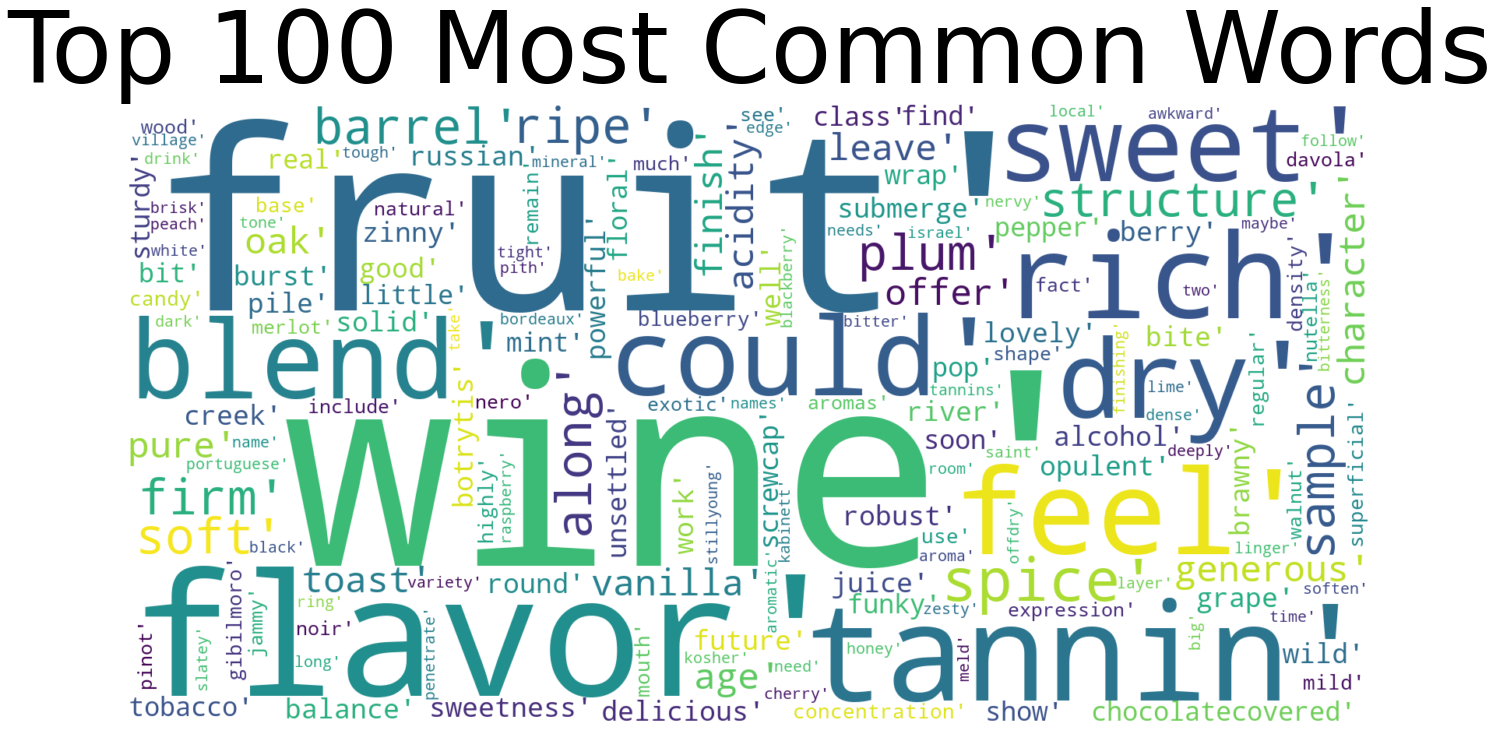

In [7]:
mostcommon = FreqDist(words).most_common(10)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

## Model 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
import tpot as tp
import contractions
import spacy
import tensorflow as tf
import keras as k
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
wines.description.head()

In [ ]:
corpus = wines['description']
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names()

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(10,10))
X2 = vectorizer2.fit_transform(corpus)

In [ ]:
vectorizer2.get_feature_names()